### Problem Statement
Understanding the vehicle crashes dataset of New York and develop a multiclass classifier to classify the contributing factor for those crashes

### About the data:
The Motor Vehicle Collisions vehicle table contains details on each vehicle involved in the crash. Each row represents a motor vehicle involved in a crash. The data in this table goes back to April 2016 when crash reporting switched to an electronic system.

The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC. The police report (MV104-AN) is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage.

    Column Name                   Description   
    UNIQUE_ID                    Unique record code generated by system.
    COLLISION_ID                  Crash identification code. Foreign Key, matches unique_id from the Crash table.
    CRASH_DATE                  Occurrence date of collision 
    CRASH_TIME                  Occurrence time of collision 
    VEHICLE_ID                  Vehicle identification code assigned by system 
    STATE_REGISTRATION          State where vehicle is registered. 
    VEHICLE_TYPE                  Type of vehicle based on the selected vehicle category 
    VEHICLE_MAKE                  Vehicle make 
    VEHICLE_MODEL                Vehicle model
    VEHICLE_YEAR                  Year the vehicle was manufactured
    TRAVEL_DIRECTION              Direction vehicle was traveling 
    VEHICLE_OCCUPANTS            Number of vehicle occupants 
    DRIVER_SEX                  Gender of driver 
    DRIVER_LICENSE_STATUS        License, permit, unlicensed 
    DRIVER_LICENSE_JURISDICTION   State where driver license was issued.
    PRE_CRASH Pre-crash action:   Going straight, making right turn, passing, backing, etc.
    POINT_OF_IMPACT            Location on the vehicle of the initial point of impact 
    VEHICLE_DAMAGE              Location on the vehicle where most of the damage occurred 
    VEHICLE_DAMAGE_1              Additional damage locations on the vehicle 
    VEHICLE_DAMAGE_2              Additional damage locations on the vehicle 
    VEHICLE_DAMAGE_3              Additional damage locations on the vehicle 
    PUBLIC_PROPERTY_DAMAGE      Public property damaged (Yes or No) 
    PUBLIC_PROPERTY_DAMAGE_TYPE   Type of public property damaged (ex. Sign, fence, light post, etc.) 
    CONTRIBUTING_FACTOR_1        Factors contributing to the collision for designated vehicle 
    CONTRIBUTING_FACTOR_2        Factors contributing to the collision for designated vehicle 

- Dataset link: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Vehicles/bm4k-52h4

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Importing the dataset

In [2]:
dataset = pd.read_csv('Motor_Vehicle_Collisions_-_Vehicles (1).csv', delimiter=',',on_bad_lines='skip',low_memory=False)
                      
                      

In [3]:
dataset.head(3).T

,0,1,2
UNIQUE_ID,10385780,19140702,14887647
COLLISION_ID,100201,4213082,3307608
CRASH_DATE,09/07/2012,09/23/2019,10/02/2015
CRASH_TIME,9:03,8:15,17:18
VEHICLE_ID,1,0553ab4d-9500-4cba-8d98-f4d7f89d5856,2
STATE_REGISTRATION,NY,NY,NY
VEHICLE_TYPE,PASSENGER VEHICLE,Station Wagon/Sport Utility Vehicle,TAXI
VEHICLE_MAKE,NaN,TOYT -CAR/SUV,NaN
VEHICLE_MODEL,NaN,NaN,NaN
VEHICLE_YEAR,NaN,2002.0,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704406 entries, 0 to 3704405
Data columns (total 25 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   UNIQUE_ID                    int64  
 1   COLLISION_ID                 int64  
 2   CRASH_DATE                   object 
 3   CRASH_TIME                   object 
 4   VEHICLE_ID                   object 
 5   STATE_REGISTRATION           object 
 6   VEHICLE_TYPE                 object 
 7   VEHICLE_MAKE                 object 
 8   VEHICLE_MODEL                object 
 9   VEHICLE_YEAR                 float64
 10  TRAVEL_DIRECTION             object 
 11  VEHICLE_OCCUPANTS            float64
 12  DRIVER_SEX                   object 
 13  DRIVER_LICENSE_STATUS        object 
 14  DRIVER_LICENSE_JURISDICTION  object 
 15  PRE_CRASH                    object 
 16  POINT_OF_IMPACT              object 
 17  VEHICLE_DAMAGE               object 
 18  VEHICLE_DAMAGE_1             object 
 19  

In [5]:
dataset.describe()

,UNIQUE_ID,COLLISION_ID,VEHICLE_YEAR,VEHICLE_OCCUPANTS
count,3.704406e+06,3.704406e+06,1.907435e+06,1.986000e+06
mean,1.606087e+07,2.996659e+06,2.014806e+03,1.010392e+03
std,3.244903e+06,1.495340e+06,1.551508e+02,9.945742e+05
min,1.117110e+05,2.200000e+01,1.000000e+03,0.000000e+00
25%,1.421516e+07,3.017853e+06,2.008000e+03,1.000000e+00
50%,1.730606e+07,3.567068e+06,2.013000e+03,1.000000e+00
75%,1.873920e+07,4.028145e+06,2.016000e+03,1.000000e+00
max,2.012172e+07,4.484197e+06,2.006300e+04,1.000000e+09


### Data Cleaning and Feature Engineering

### Understanding missing value distribution

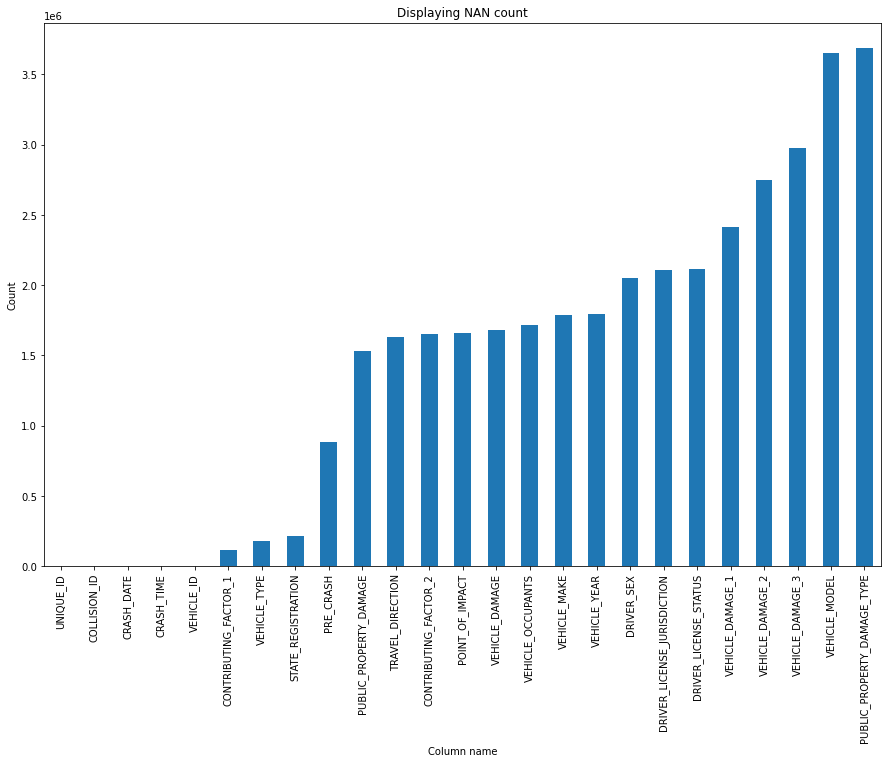

In [6]:
dataset.isna().sum().sort_values().plot(kind = 'bar', figsize=(15,10))
plt.gcf().set_size_inches(15,10)
plt.title('Displaying NAN count')
plt.xlabel('Column name')
plt.ylabel('Count')
plt.show()

In [7]:
dataset.isnull().sum() * 100 / len(dataset)

UNIQUE_ID                       0.000000
COLLISION_ID                    0.000000
CRASH_DATE                      0.000000
CRASH_TIME                      0.000000
VEHICLE_ID                      0.000000
STATE_REGISTRATION              5.859185
VEHICLE_TYPE                    4.800365
VEHICLE_MAKE                   48.199549
VEHICLE_MODEL                  98.613165
VEHICLE_YEAR                   48.509019
TRAVEL_DIRECTION               44.120731
VEHICLE_OCCUPANTS              46.388166
DRIVER_SEX                     55.347227
DRIVER_LICENSE_STATUS          57.175401
DRIVER_LICENSE_JURISDICTION    56.966110
PRE_CRASH                      23.825682
POINT_OF_IMPACT                44.865952
VEHICLE_DAMAGE                 45.325458
VEHICLE_DAMAGE_1               65.244441
VEHICLE_DAMAGE_2               74.141981
VEHICLE_DAMAGE_3               80.340816
PUBLIC_PROPERTY_DAMAGE         41.271475
PUBLIC_PROPERTY_DAMAGE_TYPE    99.477865
CONTRIBUTING_FACTOR_1           3.180078
CONTRIBUTING_FAC

### Observations
- There are very few rows like unique_id, collision_id, date and time with no missing data.
- Columns such as VEHICLE_MODEL, VEHICLE_DAMAGE_1, VEHICLE_DAMAGE_2, VEHICLE_DAMAGE_3, PUBLIC_PROPERTY_DAMAGE_TYPE have more than 65% of missing values.

### Understanding the Contributing factor distribution

In [8]:
dataset.CONTRIBUTING_FACTOR_1.value_counts().head()

Unspecified                       2131906
Driver Inattention/Distraction     444452
Failure to Yield Right-of-Way      123777
Following Too Closely              114654
Other Vehicular                     90629
Name: CONTRIBUTING_FACTOR_1, dtype: int64

In [9]:
dataset.CONTRIBUTING_FACTOR_1 = dataset.CONTRIBUTING_FACTOR_1.str.lower()
dataset.CONTRIBUTING_FACTOR_2 = dataset.CONTRIBUTING_FACTOR_2.str.lower()

def contributing_factor(factor1,factor2):
    if factor1 == 'unspecified':
        return factor2
    else:
        return factor1

In [10]:
dataset['CONTRIBUTING_FACTOR_1'] = dataset.apply(lambda x :contributing_factor(x['CONTRIBUTING_FACTOR_1'], 
                                                                               x['CONTRIBUTING_FACTOR_2']), axis=1)


In [11]:
dataset.CONTRIBUTING_FACTOR_1.value_counts().head()

unspecified                       1074997
driver inattention/distraction     447408
failure to yield right-of-way      124464
following too closely              116151
other vehicular                     91991
Name: CONTRIBUTING_FACTOR_1, dtype: int64

### Observations
- Reduced the number of rows with values 'Unspecified' by 49.8%.

### Property demage Distribution

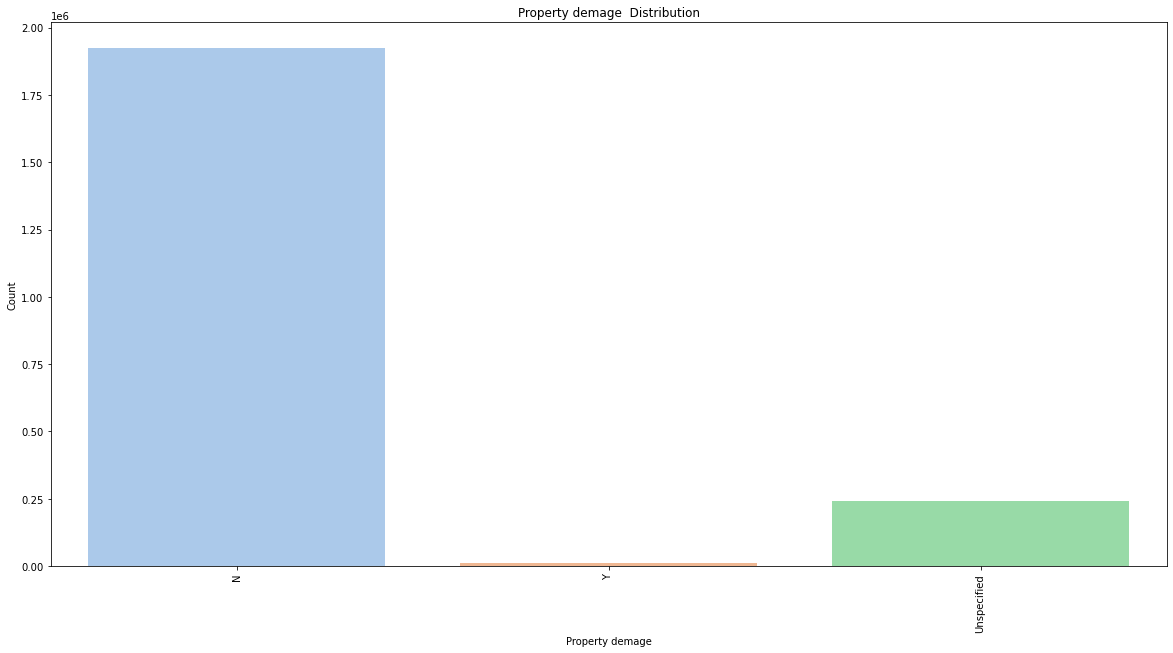

In [12]:
sns.countplot(x='PUBLIC_PROPERTY_DAMAGE', palette="pastel", data=dataset)
plt.gcf().set_size_inches(20,10)
plt.title('Property demage  Distribution')
plt.xlabel('Property demage')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()


### Observations
- More than 90% of the data has 'No' that means in more than 90% of crashes there was no property damage.

### Vehicle Damage Distribution

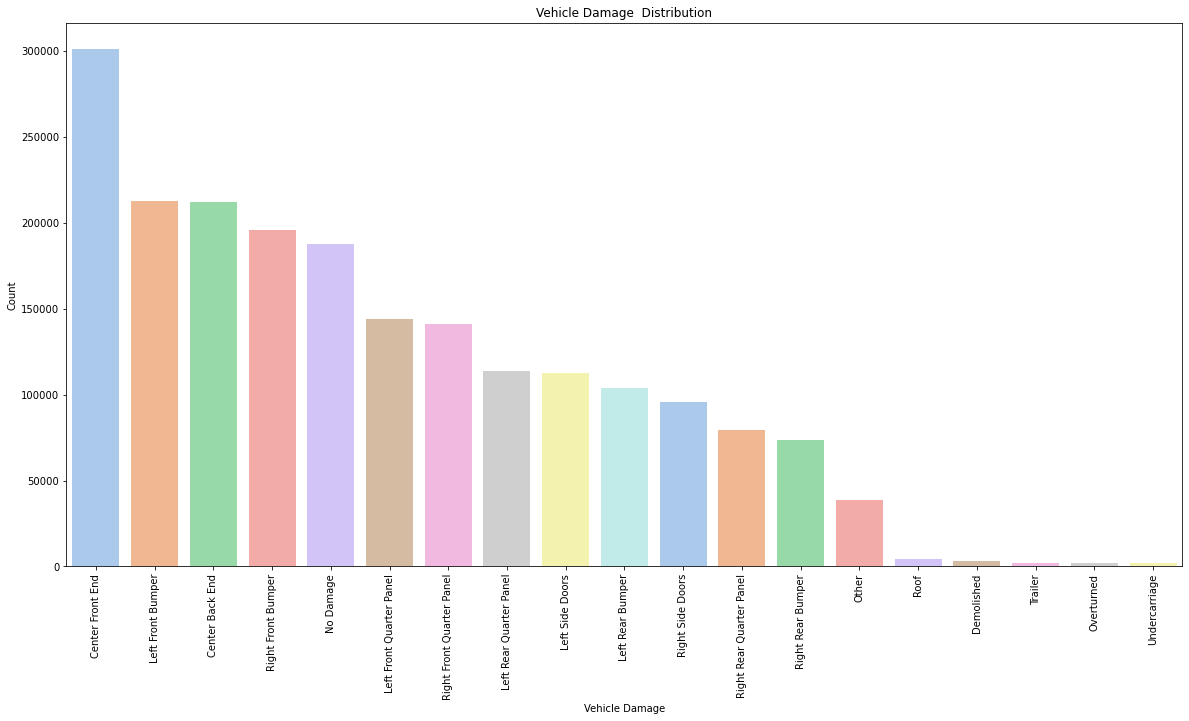

In [13]:
sns.countplot(x='VEHICLE_DAMAGE', palette="pastel", data=dataset, order=dataset.VEHICLE_DAMAGE.value_counts().index)
plt.gcf().set_size_inches(20,10)
plt.title('Vehicle Damage  Distribution')
plt.xlabel('Vehicle Damage')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()

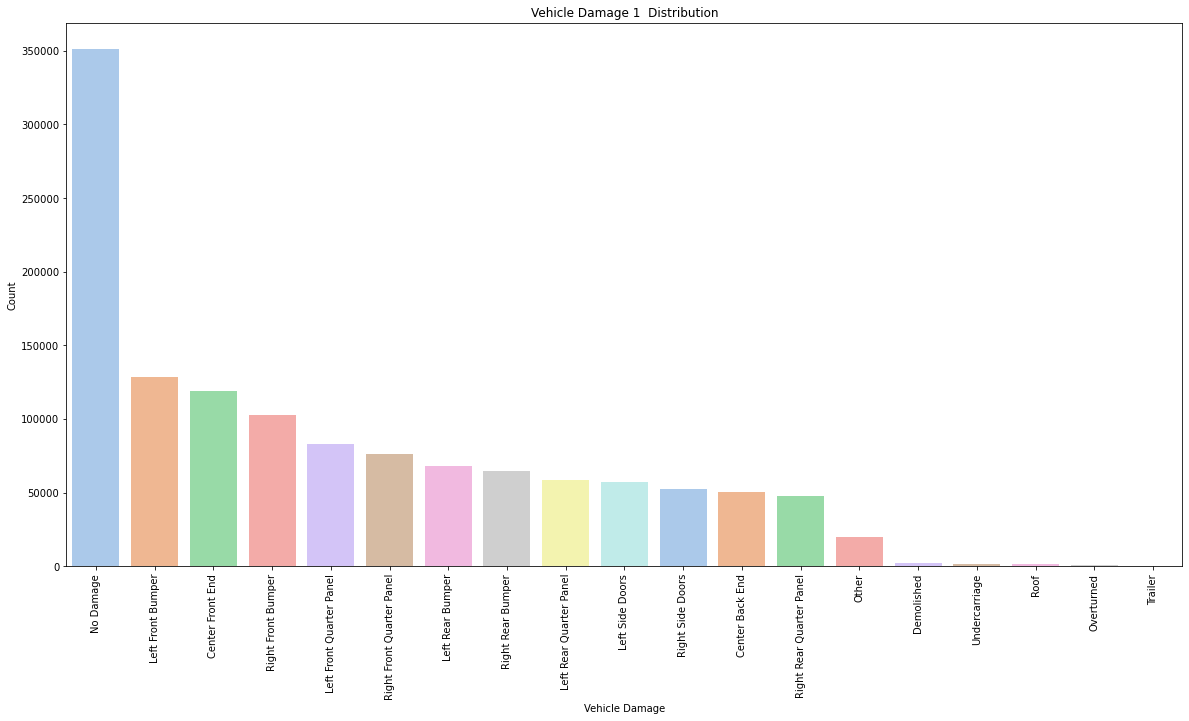

In [14]:
sns.countplot(x='VEHICLE_DAMAGE_1', palette="pastel", data=dataset, order=dataset.VEHICLE_DAMAGE_1.value_counts().index)
plt.gcf().set_size_inches(20,10)
plt.title('Vehicle Damage 1  Distribution')
plt.xlabel('Vehicle Damage')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()

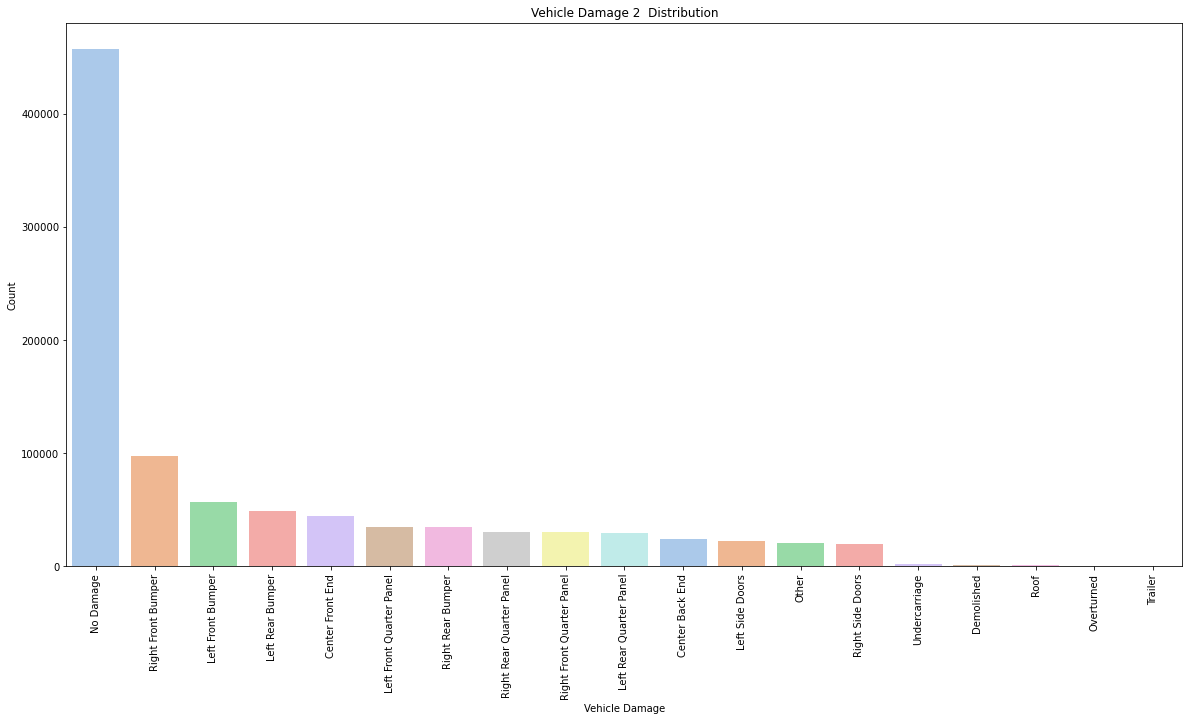

In [15]:
sns.countplot(x='VEHICLE_DAMAGE_2', palette="pastel", data=dataset, order=dataset.VEHICLE_DAMAGE_2.value_counts().index)
plt.gcf().set_size_inches(20,10)
plt.title('Vehicle Damage 2  Distribution')
plt.xlabel('Vehicle Damage')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()

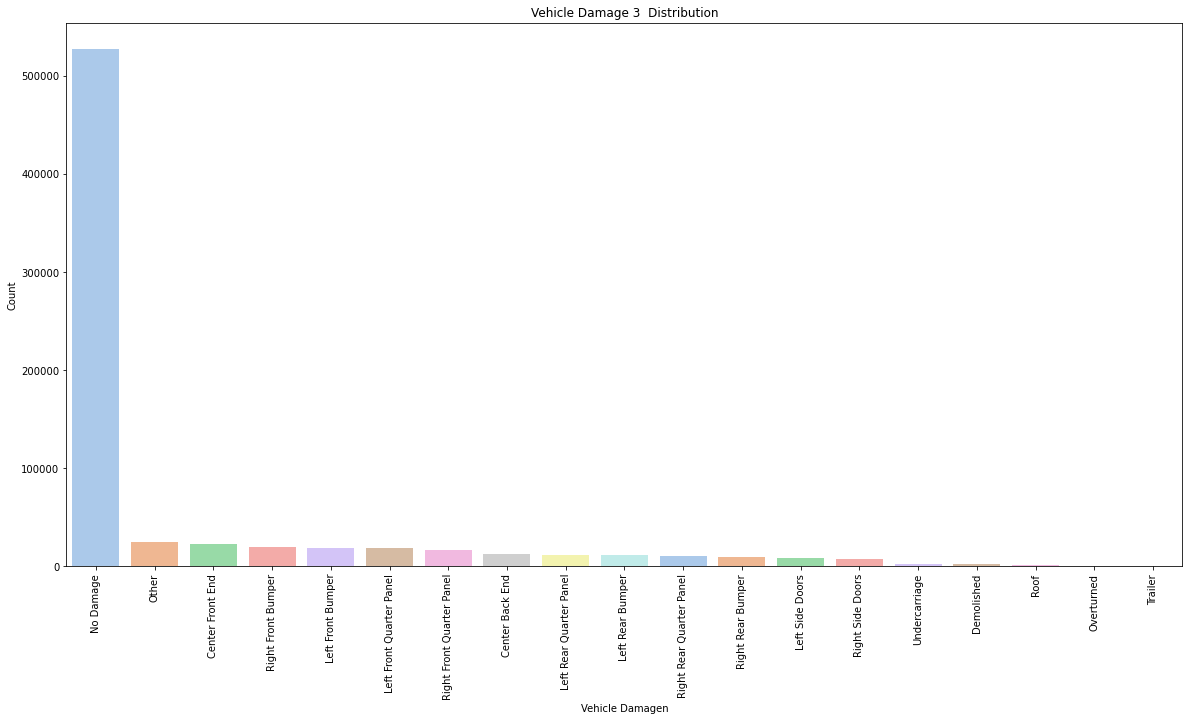

In [16]:
sns.countplot(x='VEHICLE_DAMAGE_3', palette="pastel", data=dataset, order=dataset.VEHICLE_DAMAGE_3.value_counts().index)
plt.gcf().set_size_inches(20,10)
plt.title('Vehicle Damage 3  Distribution')
plt.xlabel('Vehicle Damagen')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()

In [17]:
# trying to decrease the number of missing values
def vehicle_damage(damage1, damage2, damage3, damage4):
    if not pd.isna(damage1):
        return damage1
    elif not pd.isna(damage2):
        return damage2
    elif not pd.isna(damage3):
        return damage3
    else:
        return damage4

In [18]:
dataset['VEHICLE_DAMAGE_cleaned'] = dataset.apply(lambda x :vehicle_damage(x['VEHICLE_DAMAGE'], x['VEHICLE_DAMAGE_1'],
                                                                  x['VEHICLE_DAMAGE_2'], x['VEHICLE_DAMAGE_3']), axis=1)

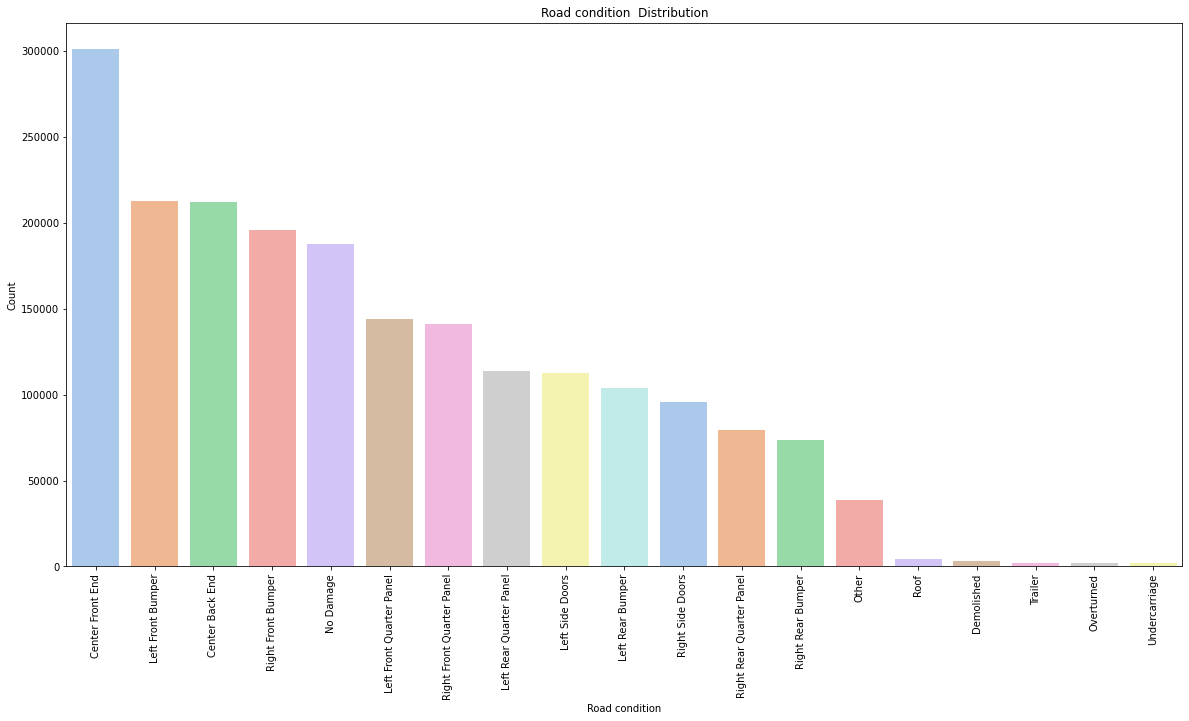

45.313499654195574


In [19]:
dataset.VEHICLE_DAMAGE_cleaned = dataset.VEHICLE_DAMAGE_cleaned.str.lower()
sns.countplot(x='VEHICLE_DAMAGE', palette="pastel", data=dataset, order=dataset.VEHICLE_DAMAGE.value_counts().index)
plt.gcf().set_size_inches(20,10)
plt.title('Road condition  Distribution')
plt.xlabel('Road condition')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()
print(dataset.VEHICLE_DAMAGE_cleaned.isnull().sum() * 100 / len(dataset))

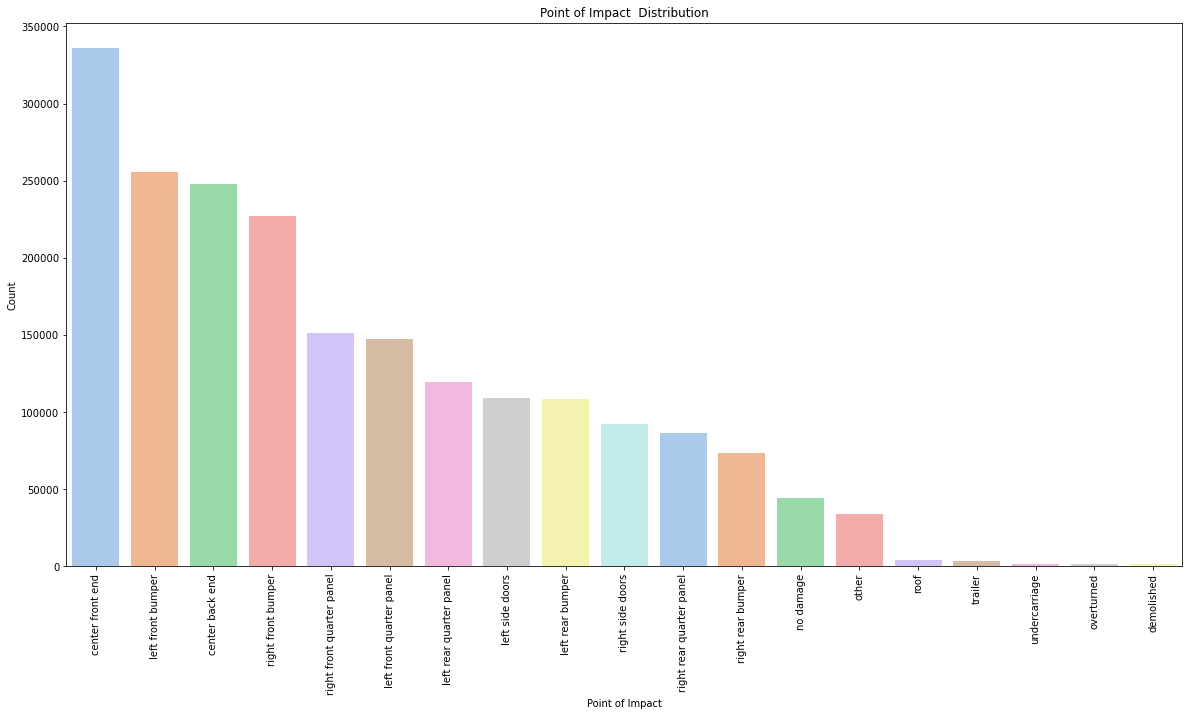

In [20]:
dataset.POINT_OF_IMPACT = dataset.POINT_OF_IMPACT.str.lower()
sns.countplot(x='POINT_OF_IMPACT', palette="pastel", data=dataset, order=dataset.POINT_OF_IMPACT.value_counts().index)
plt.gcf().set_size_inches(20,10)
plt.title('Point of Impact  Distribution')
plt.xlabel('Point of Impact')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()


### Observations
- Most of the damages have occured at the front end of the car compared to other parts.

### Pre Crash action Distribution

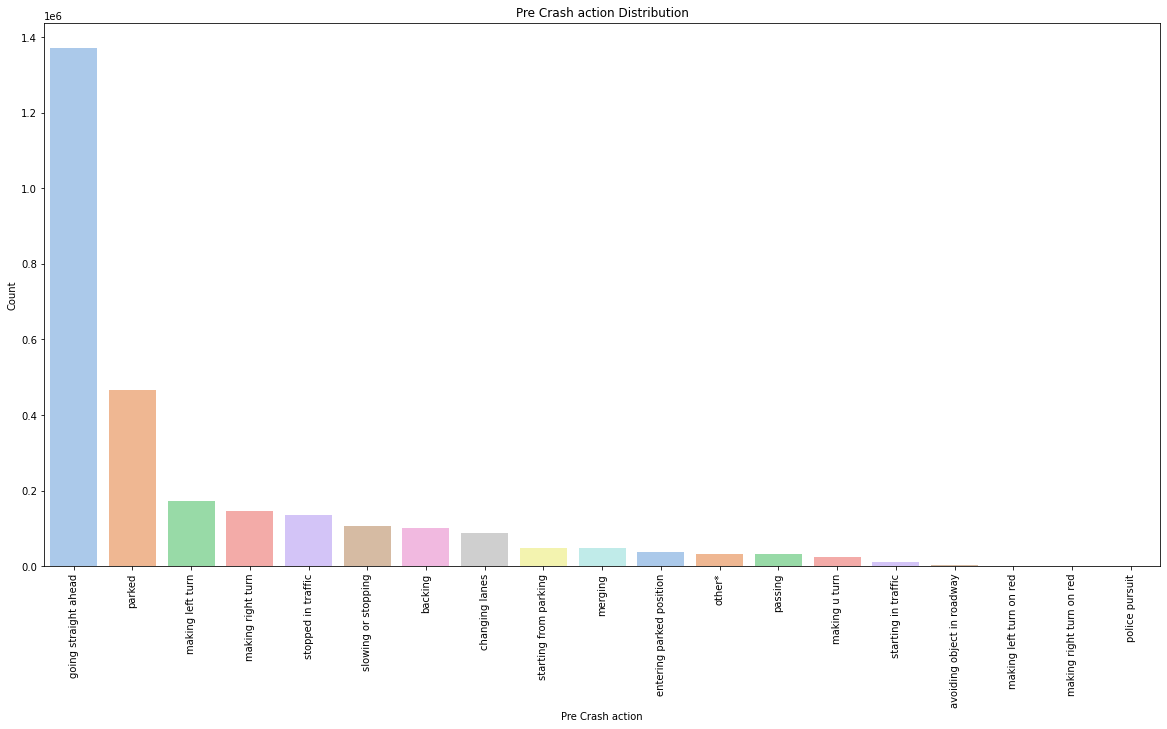

In [21]:
dataset.PRE_CRASH = dataset.PRE_CRASH.str.lower()
sns.countplot(x='PRE_CRASH', palette="pastel", data=dataset, order=dataset.PRE_CRASH.value_counts().index)
plt.gcf().set_size_inches(20,10)
plt.title('Pre Crash action Distribution')
plt.xlabel('Pre Crash action')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()

### Observations
- A great portion of cars that were involved in an accident were either going straight or were parked.

### Drivers License Status Distribution


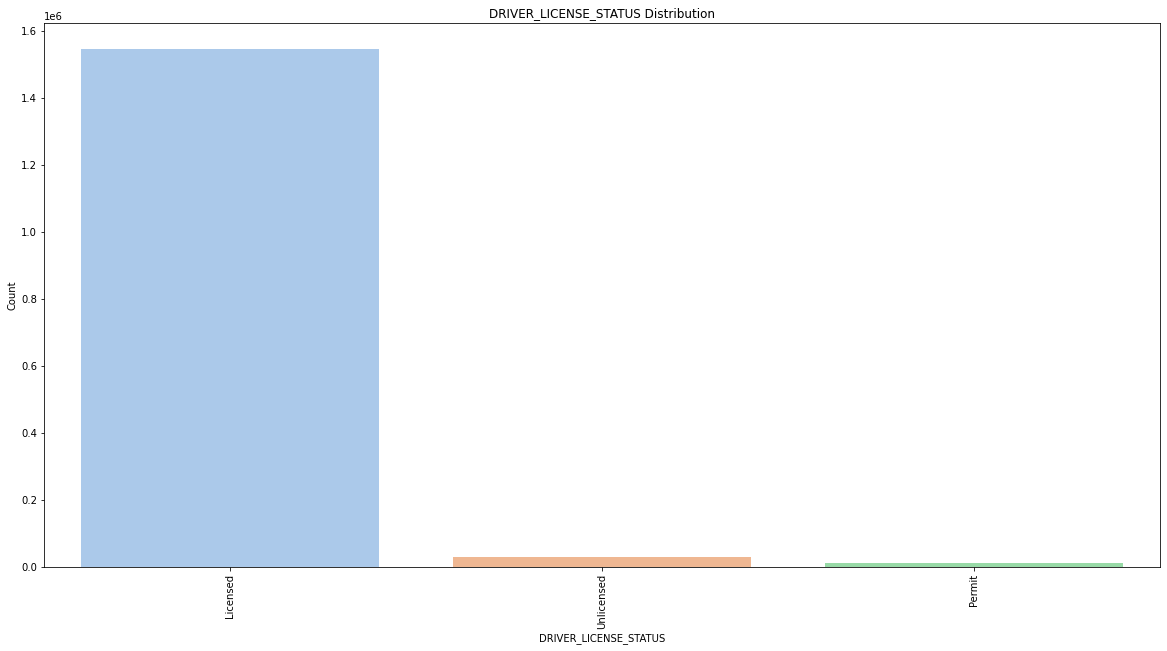

In [22]:
sns.countplot(x='DRIVER_LICENSE_STATUS', palette="pastel", data=dataset, order=dataset.DRIVER_LICENSE_STATUS.value_counts().index)
plt.gcf().set_size_inches(20,10)
plt.title('DRIVER_LICENSE_STATUS Distribution')
plt.xlabel('DRIVER_LICENSE_STATUS')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()


### Observations
- About 95% of people who were involved in an accident are licensed.

### Driver Sex Distribution

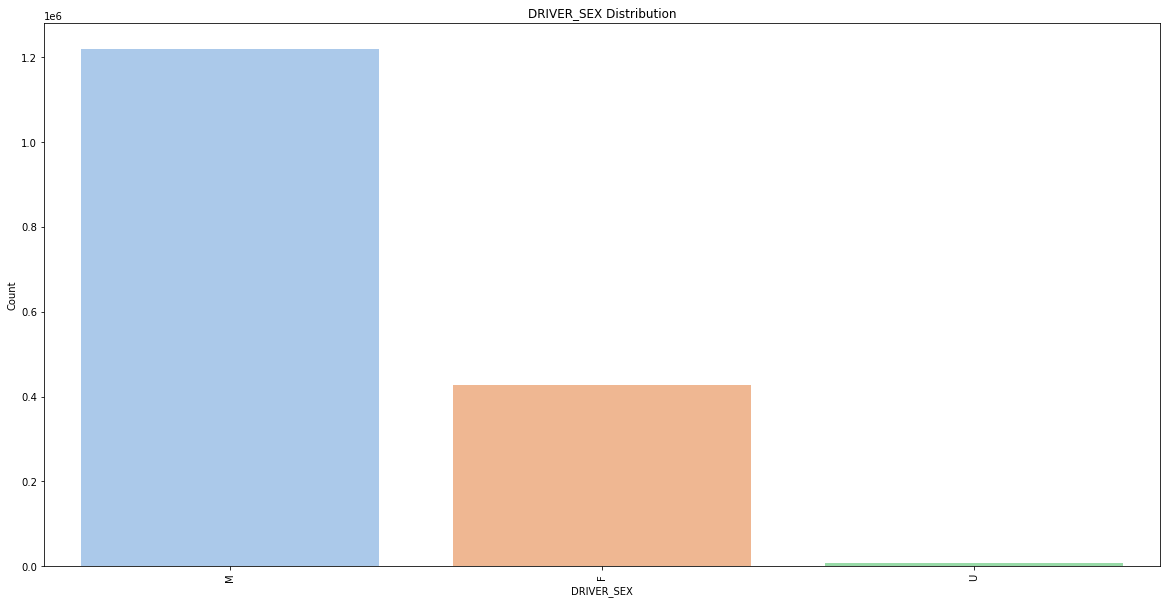

In [23]:
sns.countplot(x='DRIVER_SEX', palette="pastel", data=dataset, order=dataset.DRIVER_SEX.value_counts().index)
plt.gcf().set_size_inches(20,10)
plt.title('DRIVER_SEX Distribution')
plt.xlabel('DRIVER_SEX')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()

### Observations
- Majority of accidents were caused by Males.

### Understanding the vehicle occupants distribution

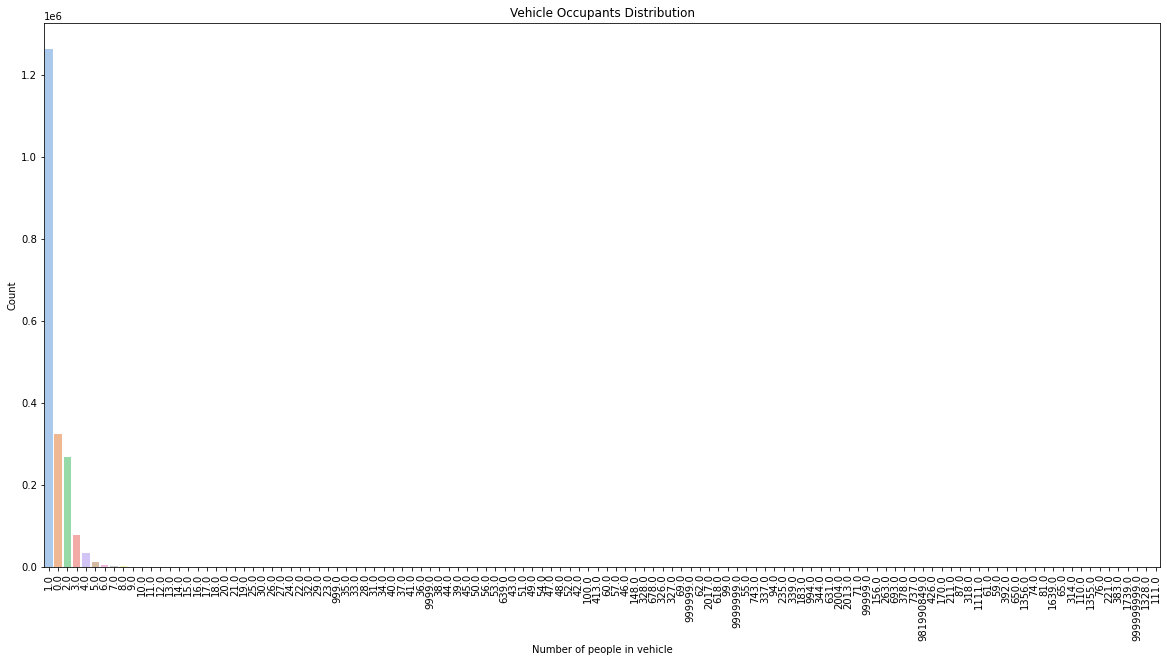

In [24]:
sns.countplot(x='VEHICLE_OCCUPANTS', palette="pastel", data=dataset, order=dataset.VEHICLE_OCCUPANTS.value_counts().index)
plt.gcf().set_size_inches(20,10)
plt.title('Vehicle Occupants Distribution')
plt.xlabel('Number of people in vehicle')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()

In [26]:
dataset.VEHICLE_OCCUPANTS.value_counts()

1.0            1262475
0.0             324444
2.0             267377
3.0              76955
4.0              32637
                ...   
383.0                1
1739.0               1
999999999.0          1
1328.0               1
111.0                1
Name: VEHICLE_OCCUPANTS, Length: 120, dtype: int64


### Cleaning the vehicle occupants distribtion

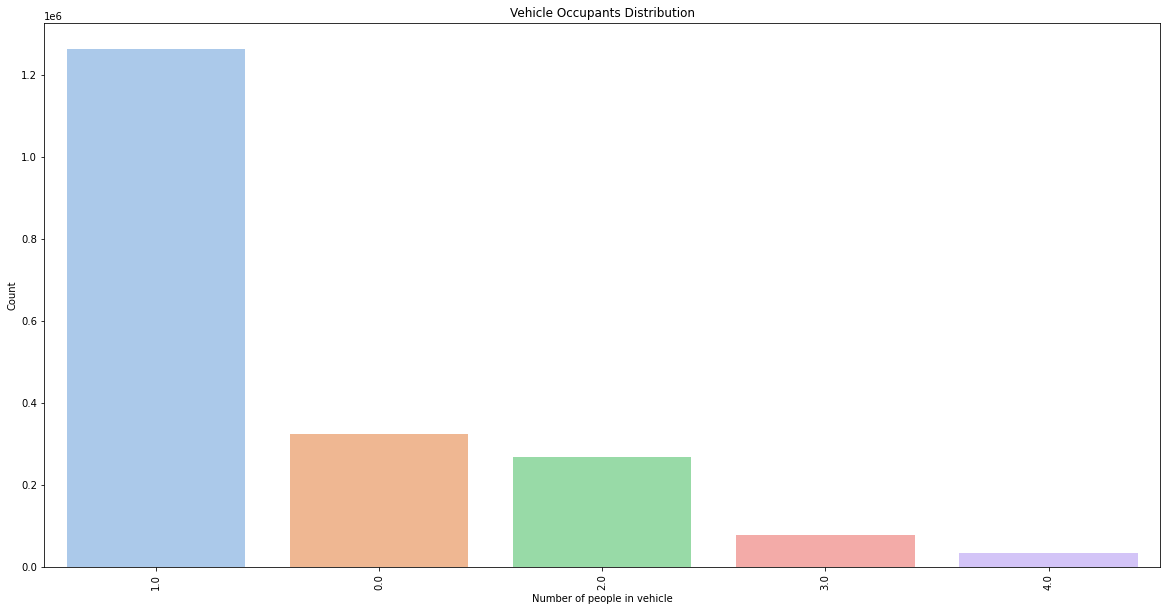

In [30]:
occupants_ls = [1,2,3,4,0]
dataset = dataset[dataset.VEHICLE_OCCUPANTS.isin(occupants_ls)]
sns.countplot(x='VEHICLE_OCCUPANTS', palette="pastel", data=dataset, order=dataset.VEHICLE_OCCUPANTS.value_counts().index)
plt.gcf().set_size_inches(20,10)
plt.title('Vehicle Occupants Distribution')
plt.xlabel('Number of people in vehicle')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()


In [ ]:
dataset.head(3)

In [27]:
occupants_ls = [1,2,3,4,0]

In [31]:
dataset2 = dataset[dataset.VEHICLE_OCCUPANTS.isin(occupants_ls)]
dataset2

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,VEHICLE_DAMAGE_cleaned
1,19140702,4213082,09/23/2019,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,...,left front bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,driver inattention/distraction,unspecified,left front quarter panel
5,17044639,3434155,05/02/2016,17:35,219456,NY,4 dr sedan,MERZ -CAR/SUV,NaN,2015.0,...,right front bumper,Right Front Bumper,Right Front Quarter Panel,NaN,NaN,N,NaN,driver inattention/distraction,unsafe lane changing,right front bumper
7,17303317,3503027,08/18/2016,12:39,672828,NY,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,NaN,2005.0,...,center front end,Center Front End,No Damage,No Damage,No Damage,N,NaN,driver inattention/distraction,unspecified,center front end
10,17285715,3487936,07/22/2016,15:40,554272,NY,Convertible,VOLK -CAR/SUV,NaN,2013.0,...,right rear bumper,Right Rear Bumper,Center Back End,Left Rear Bumper,NaN,N,NaN,unspecified,unspecified,right rear bumper
12,17307366,3499697,08/13/2016,21:05,650962,NY,Sedan,NISS -CAR/SUV,NaN,2015.0,...,left side doors,Left Side Doors,Left Rear Quarter Panel,NaN,NaN,N,NaN,unspecified,unspecified,left side doors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704401,20107423,4477591,11/15/2021,8:40,beb4bb74-d34d-45ac-9490-98ba62845101,PA,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,NaN,2021.0,...,right front quarter panel,Right Side Doors,No Damage,No Damage,No Damage,N,NaN,unspecified,unspecified,right side doors
3704402,20116373,4481414,11/24/2021,13:55,973d9175-ebbe-48f9-8a2e-1ae605c34dd2,NY,Station Wagon/Sport Utility Vehicle,CHEV -CAR/SUV,NaN,2012.0,...,center back end,Center Back End,Left Rear Bumper,Left Rear Quarter Panel,NaN,N,NaN,unspecified,unspecified,center back end
3704403,20105181,4476575,11/11/2021,14:20,3a617316-bf31-4226-8e57-755af0c97706,NJ,Station Wagon/Sport Utility Vehicle,NISS -CAR/SUV,NaN,2007.0,...,left front quarter panel,Left Front Quarter Panel,Left Side Doors,Right Front Quarter Panel,NaN,N,NaN,unspecified,unspecified,left front quarter panel
3704404,20101210,4474811,11/06/2021,12:30,b7e355b1-6fb8-47bf-87be-55c0c45282f4,NY,Sedan,FORD -CAR/SUV,NaN,2018.0,...,center front end,Center Front End,Left Front Bumper,Right Front Bumper,Left Front Quarter Panel,N,NaN,driver inattention/distraction,following too closely,center front end


<AxesSubplot:xlabel='VEHICLE_OCCUPANTS', ylabel='count'>

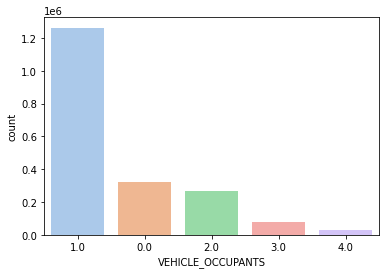

In [29]:
sns.countplot(x='VEHICLE_OCCUPANTS', palette="pastel", data=dataset2, order=dataset2.VEHICLE_OCCUPANTS.value_counts().index)



In [ ]:
plt.gcf().set_size_inches(20,10)

### Vehicle Year Distribution

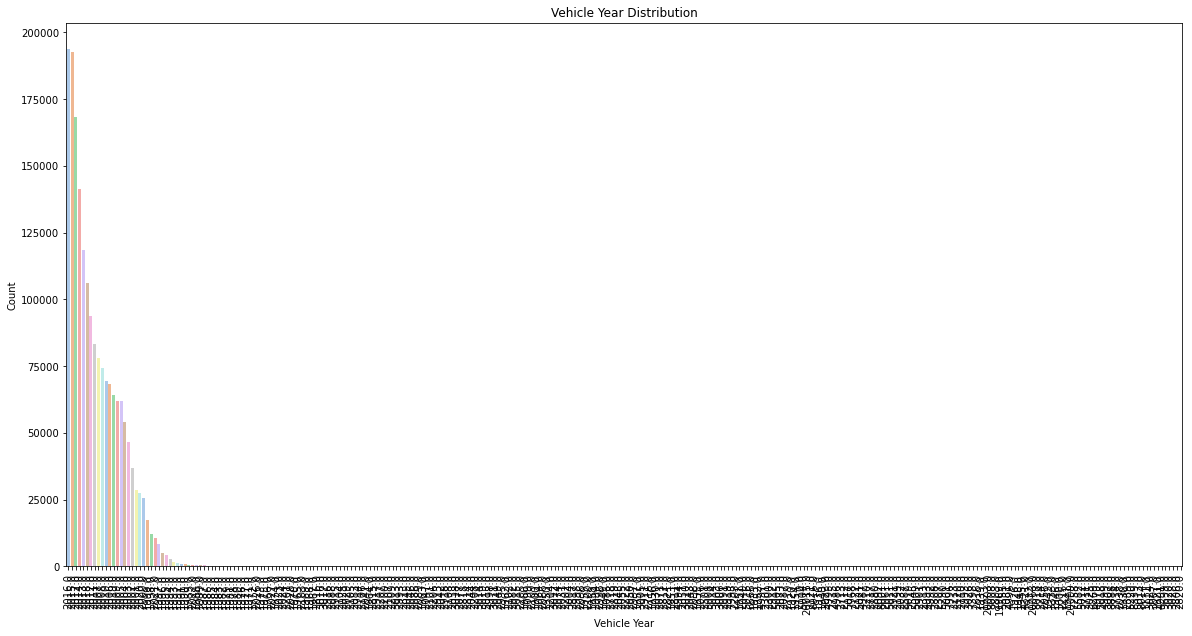

In [32]:
sns.countplot(x='VEHICLE_YEAR', palette="pastel", data=dataset, order=dataset.VEHICLE_YEAR.value_counts().index)
plt.gcf().set_size_inches(20,10)
plt.title('Vehicle Year Distribution')
plt.xlabel('Vehicle Year')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()

### Cleaning the Vehicle Year Distribution column.

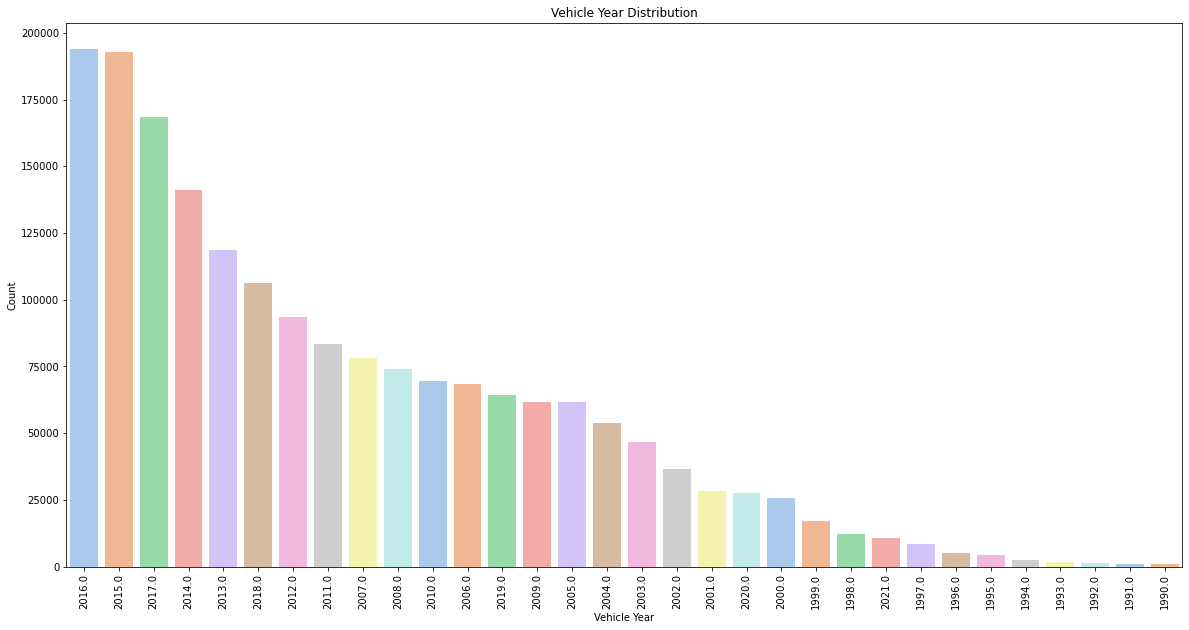

In [33]:
dataset = dataset[dataset.VEHICLE_YEAR >=1990]
dataset = dataset[dataset.VEHICLE_YEAR <=2021]
sns.countplot(x='VEHICLE_YEAR', palette="pastel", data=dataset, order=dataset.VEHICLE_YEAR.value_counts().index)
plt.gcf().set_size_inches(20,10)
plt.title('Vehicle Year Distribution')
plt.xlabel('Vehicle Year')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()

In [34]:
dataset['how_old'] = 2021 - dataset.VEHICLE_YEAR
dataset.head(2).T

,1,5
UNIQUE_ID,19140702,17044639
COLLISION_ID,4213082,3434155
CRASH_DATE,09/23/2019,05/02/2016
CRASH_TIME,8:15,17:35
VEHICLE_ID,0553ab4d-9500-4cba-8d98-f4d7f89d5856,219456
STATE_REGISTRATION,NY,NY
VEHICLE_TYPE,Station Wagon/Sport Utility Vehicle,4 dr sedan
VEHICLE_MAKE,TOYT -CAR/SUV,MERZ -CAR/SUV
VEHICLE_MODEL,NaN,NaN
VEHICLE_YEAR,2002.0,2015.0


### Cleaning the vehicle type and vehicle make columns.

In [36]:
dataset.VEHICLE_TYPE = dataset.VEHICLE_TYPE.str.lower()
dataset.VEHICLE_MAKE = dataset.VEHICLE_MAKE.str.lower()


In [37]:
dataset.VEHICLE_TYPE = dataset.VEHICLE_TYPE.str.lower()
dataset.loc[dataset['VEHICLE_TYPE']=='sport utility / station wagon', 'VEHICLE_TYPE'] = 'station wagon/sport utility vehicle'
dataset.loc[dataset['VEHICLE_TYPE']=='4 dr sedan', 'VEHICLE_TYPE'] = 'sedan'
dataset.loc[dataset['VEHICLE_TYPE']=='motorcycle', 'VEHICLE_TYPE'] = 'bike'

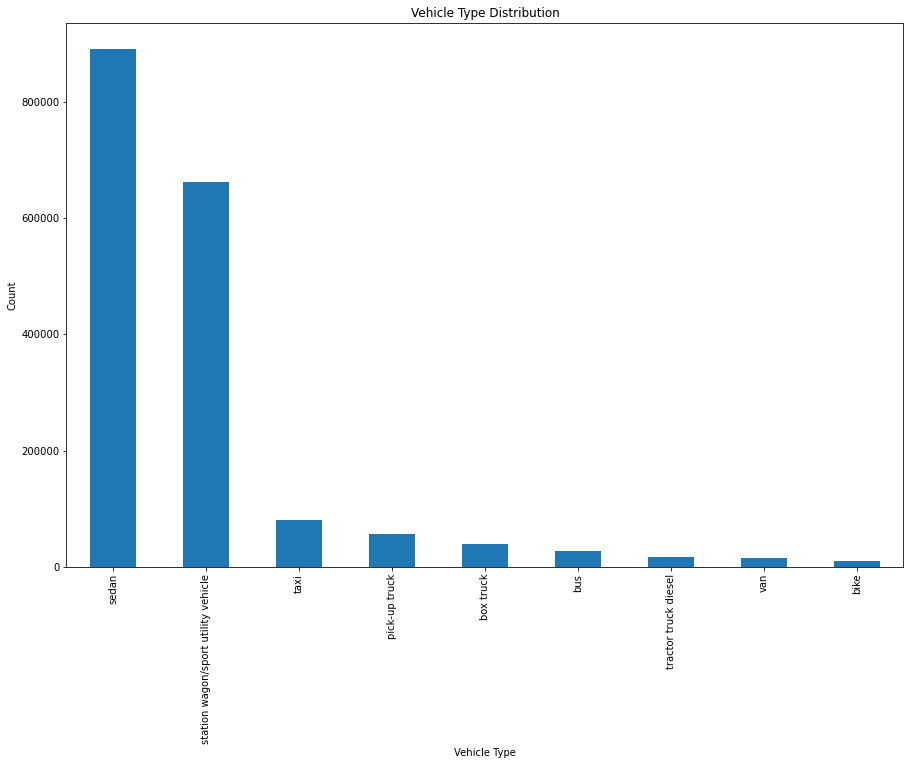

In [38]:
dataset.VEHICLE_TYPE.value_counts().loc[lambda x : x>10000].plot(kind='bar', figsize=(15,10))
plt.title('Vehicle Type Distribution')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

In [39]:
dataset["MAKE"] = dataset.VEHICLE_MAKE.str.split(" ", n = 1, expand = True)[0]
dataset["MAKE"] = dataset.MAKE.str.split("-", n = 1, expand = True)[0]
dataset.head(2)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,VEHICLE_DAMAGE_cleaned,how_old,MAKE
1,19140702,4213082,09/23/2019,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,station wagon/sport utility vehicle,toyt -car/suv,NaN,2002.0,...,NaN,NaN,NaN,N,NaN,driver inattention/distraction,unspecified,left front quarter panel,19.0,toyt
5,17044639,3434155,05/02/2016,17:35,219456,NY,sedan,merz -car/suv,NaN,2015.0,...,Right Front Quarter Panel,NaN,NaN,N,NaN,driver inattention/distraction,unsafe lane changing,right front bumper,6.0,merz


### Cleaning the crash date and crash time columns

In [40]:
dataset['CRASH_DATE'] =  pd.to_datetime(dataset['CRASH_DATE'], format='%m/%d/%Y')
dataset['CRASH_TIME'] =  pd.to_datetime(dataset['CRASH_TIME'], format='%H:%M').dt.time
dataset['Year'] = pd.to_datetime(dataset['CRASH_DATE'], format='%m/%d/%Y').dt.year
dataset['Month'] = pd.to_datetime(dataset['CRASH_DATE'], format='%m/%d/%Y').dt.month
dataset['Week'] = pd.to_datetime(dataset['CRASH_DATE'], format='%m/%d/%Y').apply(lambda d: (d.day-1) // 7 + 1)
dataset['Hour'] = pd.to_datetime(dataset['CRASH_TIME'], format='%H:%M:%S').dt.hour
dataset = dataset[dataset.Year>2015]

In [41]:
dataset.head().T

,1,5,7,10,12
UNIQUE_ID,19140702,17044639,17303317,17285715,17307366
COLLISION_ID,4213082,3434155,3503027,3487936,3499697
CRASH_DATE,2019-09-23 00:00:00,2016-05-02 00:00:00,2016-08-18 00:00:00,2016-07-22 00:00:00,2016-08-13 00:00:00
CRASH_TIME,08:15:00,17:35:00,12:39:00,15:40:00,21:05:00
VEHICLE_ID,0553ab4d-9500-4cba-8d98-f4d7f89d5856,219456,672828,554272,650962
STATE_REGISTRATION,NY,NY,NY,NY,NY
VEHICLE_TYPE,station wagon/sport utility vehicle,sedan,station wagon/sport utility vehicle,convertible,sedan
VEHICLE_MAKE,toyt -car/suv,merz -car/suv,ford -car/suv,volk -car/suv,niss -car/suv
VEHICLE_MODEL,NaN,NaN,NaN,NaN,NaN
VEHICLE_YEAR,2002.0,2015.0,2005.0,2013.0,2015.0


In [42]:
dataset.columns

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'VEHICLE_ID',
       'STATE_REGISTRATION', 'VEHICLE_TYPE', 'VEHICLE_MAKE', 'VEHICLE_MODEL',
       'VEHICLE_YEAR', 'TRAVEL_DIRECTION', 'VEHICLE_OCCUPANTS', 'DRIVER_SEX',
       'DRIVER_LICENSE_STATUS', 'DRIVER_LICENSE_JURISDICTION', 'PRE_CRASH',
       'POINT_OF_IMPACT', 'VEHICLE_DAMAGE', 'VEHICLE_DAMAGE_1',
       'VEHICLE_DAMAGE_2', 'VEHICLE_DAMAGE_3', 'PUBLIC_PROPERTY_DAMAGE',
       'PUBLIC_PROPERTY_DAMAGE_TYPE', 'CONTRIBUTING_FACTOR_1',
       'CONTRIBUTING_FACTOR_2', 'VEHICLE_DAMAGE_cleaned', 'how_old', 'MAKE',
       'Year', 'Month', 'Week', 'Hour'],
      dtype='object')

### Droping the unnecessary columns
- UNIQUE_ID, COLLISION_ID, and VEHICLE_ID as they are unique and don't add value for this analysis.
- VEHICLE_MODEL, PUBLIC_PROPERTY_DAMAGE, PUBLIC_PROPERTY_DAMAGE_TYPE as most of the data is missing.
- STATE_REGISTRATION, DRIVER_LICENSE_STATUS, TRAVEL_DIRECTION, and DRIVER_LICENSE_JURISDICTION as data is highly skewed
- VEHICLE_DAMAGE_cleaned as POINT_OF_IMPACT and VEHICLE_DAMAGE_cleaned very highly correlated.

In [43]:
dataset.drop(['UNIQUE_ID','COLLISION_ID','CRASH_DATE','CRASH_TIME','VEHICLE_ID','STATE_REGISTRATION','VEHICLE_MAKE','VEHICLE_MODEL',
              'VEHICLE_YEAR','TRAVEL_DIRECTION','DRIVER_LICENSE_STATUS','DRIVER_LICENSE_JURISDICTION','VEHICLE_DAMAGE',
              'VEHICLE_DAMAGE_1','VEHICLE_DAMAGE_2','VEHICLE_DAMAGE_3','PUBLIC_PROPERTY_DAMAGE', 
              'PUBLIC_PROPERTY_DAMAGE_TYPE','CONTRIBUTING_FACTOR_2'], axis =1 ,inplace=True)

In [44]:
len(dataset)

1860423

### Dropping NaN values

In [45]:
dataset.dropna(how='any', inplace=True)

In [46]:
len(dataset)

1545408

In [47]:
dataset.head()

,VEHICLE_TYPE,VEHICLE_OCCUPANTS,DRIVER_SEX,PRE_CRASH,POINT_OF_IMPACT,CONTRIBUTING_FACTOR_1,VEHICLE_DAMAGE_cleaned,how_old,MAKE,Year,Month,Week,Hour
1,station wagon/sport utility vehicle,1.0,M,going straight ahead,left front bumper,driver inattention/distraction,left front quarter panel,19.0,toyt,2019,9,4,8
5,sedan,2.0,M,merging,right front bumper,driver inattention/distraction,right front bumper,6.0,merz,2016,5,1,17
7,station wagon/sport utility vehicle,2.0,F,going straight ahead,center front end,driver inattention/distraction,center front end,16.0,ford,2016,8,3,12
10,convertible,1.0,M,stopped in traffic,right rear bumper,unspecified,right rear bumper,8.0,volk,2016,7,4,15
12,sedan,2.0,F,going straight ahead,left side doors,unspecified,left side doors,6.0,niss,2016,8,2,21


### Overall cleaning of the dataset

In [48]:
dataset.PRE_CRASH.value_counts()

going straight ahead          834887
parked                        112703
making left turn              109011
stopped in traffic             93270
making right turn              89111
slowing or stopping            68392
backing                        54961
changing lanes                 53647
starting from parking          29742
merging                        29732
entering parked position       22794
making u turn                  14923
passing                        12671
other*                          9659
starting in traffic             7328
avoiding object in roadway      1750
police pursuit                   328
making left turn on red          302
making right turn on red         197
Name: PRE_CRASH, dtype: int64

In [49]:
dataset.POINT_OF_IMPACT.value_counts()

center front end             257804
left front bumper            200228
center back end              199941
right front bumper           184239
right front quarter panel    122769
left front quarter panel     107006
left rear quarter panel       81457
left side doors               78724
right side doors              74841
left rear bumper              73230
right rear quarter panel      67658
right rear bumper             56407
no damage                     23834
other                          9470
trailer                        2766
roof                           2223
undercarriage                  1150
overturned                      971
demolished                      690
Name: POINT_OF_IMPACT, dtype: int64

In [50]:

dataset.CONTRIBUTING_FACTOR_1.value_counts()

unspecified                                              766152
driver inattention/distraction                           252908
following too closely                                     97209
failure to yield right-of-way                             69584
passing or lane usage improper                            41501
backing unsafely                                          38473
other vehicular                                           37338
unsafe lane changing                                      35709
passing too closely                                       32996
turning improperly                                        23695
reaction to uninvolved vehicle                            19502
driver inexperience                                       17430
traffic control disregarded                               17207
unsafe speed                                              15476
alcohol involvement                                       12280
pavement slippery                       

In [51]:
threshold = 5000 
columns = ['VEHICLE_TYPE', 'PRE_CRASH', 'POINT_OF_IMPACT','CONTRIBUTING_FACTOR_1']
for col in columns:
    value_counts = dataset[col].value_counts() 
    to_remove = value_counts[value_counts <= threshold].index
    dataset[col].replace(to_remove, "other", inplace=True)

In [52]:
len(dataset)

1545408

In [53]:
dataset.CONTRIBUTING_FACTOR_1.value_counts()

unspecified                       766152
driver inattention/distraction    252908
following too closely              97209
failure to yield right-of-way      69584
passing or lane usage improper     41501
other                              40604
backing unsafely                   38473
other vehicular                    37338
unsafe lane changing               35709
passing too closely                32996
turning improperly                 23695
reaction to uninvolved vehicle     19502
driver inexperience                17430
traffic control disregarded        17207
unsafe speed                       15476
alcohol involvement                12280
pavement slippery                  11006
view obstructed/limited             9856
oversized vehicle                   6482
Name: CONTRIBUTING_FACTOR_1, dtype: int64

In [54]:
### dropping the rows with values 'unspecified' in contributing factor
dataset.drop(dataset[dataset['CONTRIBUTING_FACTOR_1'] == 'unspecified'].index, inplace = True)
dataset.CONTRIBUTING_FACTOR_1.value_counts()

driver inattention/distraction    252908
following too closely              97209
failure to yield right-of-way      69584
passing or lane usage improper     41501
other                              40604
backing unsafely                   38473
other vehicular                    37338
unsafe lane changing               35709
passing too closely                32996
turning improperly                 23695
reaction to uninvolved vehicle     19502
driver inexperience                17430
traffic control disregarded        17207
unsafe speed                       15476
alcohol involvement                12280
pavement slippery                  11006
view obstructed/limited             9856
oversized vehicle                   6482
Name: CONTRIBUTING_FACTOR_1, dtype: int64

In [55]:

len(dataset)


779256

In [56]:
dataset.head().T

,1,5,7,18,38
VEHICLE_TYPE,station wagon/sport utility vehicle,sedan,station wagon/sport utility vehicle,station wagon/sport utility vehicle,sedan
VEHICLE_OCCUPANTS,1.0,2.0,2.0,1.0,2.0
DRIVER_SEX,M,M,F,M,M
PRE_CRASH,going straight ahead,merging,going straight ahead,passing,going straight ahead
POINT_OF_IMPACT,left front bumper,right front bumper,center front end,right front quarter panel,center front end
CONTRIBUTING_FACTOR_1,driver inattention/distraction,driver inattention/distraction,driver inattention/distraction,unsafe lane changing,driver inattention/distraction
VEHICLE_DAMAGE_cleaned,left front quarter panel,right front bumper,center front end,no damage,no damage
how_old,19.0,6.0,16.0,6.0,13.0
MAKE,toyt,merz,ford,toyt,toyt
Year,2019,2016,2016,2016,2019


In [57]:
dataset.to_csv('Cleaned_Data.csv', index=False)